# What makes dark chocolate good?

This is a basic exploratory data analysis and visualization of expert dark chocolate ratings. The dataset being used is [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings).

We'll try to answer the questions:
* What properties do the highest rated chocolates have?
* Which countries produce the highest-rated bars?
* Which companies are more likely to produce good chocolate?
* Is darker chocolate better?

## Downloading the Dataset

Downloading the [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings) dataset.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
dataset_url = 'https://www.kaggle.com/rtatman/chocolate-bar-ratings' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: m00ncat
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 30.3k/30.3k [00:00<00:00, 374kB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './chocolate-bar-ratings'

In [6]:
import os
os.listdir(data_dir)

['flavors_of_cacao.csv']

## Data Preparation and Cleaning

### Import

In [7]:
import pandas as pd
import numpy as np

In [8]:
choc_df = pd.read_csv(data_dir + '/flavors_of_cacao.csv')
choc_df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


Let us rename the column names so they are easy to refer to.

In [9]:
choc_df.columns = ['Company', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']
choc_df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Check how many null values we have in the dataset.

In [10]:
choc_df.isnull().sum()

Company                             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64

There are very few null values. However, we can see that many values in the Bean Type column are missing. Let us replace the missing values with np.nan

In [11]:
empty = choc_df['Bean Type'].values[0]

In [12]:
choc_df = choc_df.applymap(lambda x: np.nan if str(x) == empty else x)
choc_df.isnull().sum()

Company                               0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percent                         0
Company Location                      0
Rating                                0
Bean Type                           888
Broad Bean Origin                    74
dtype: int64

In [13]:
choc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         907 non-null    object 
 8   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Let us replace the missing values in Broad Bean Origin with the mode value.

In [14]:
choc_df['Broad Bean Origin'].mode()

0    Venezuela
dtype: object

In [15]:
choc_df['Broad Bean Origin'] = choc_df['Broad Bean Origin'].fillna('Venezuela')
choc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         907 non-null    object 
 8   Broad Bean Origin                 1795 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


The Cocoa Percent column is of type object. We can convert it to float64 by getting rid of the percent sign.

In [16]:
choc_df['Cocoa Percent'] = choc_df['Cocoa Percent'].apply(lambda x: float(x.strip('%')) / 100.0)

In [17]:
choc_df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru


## Exploratory Analysis and Visualization

By analyzing the dataset, let's find out what the characteristics of the best-rated chocolates are.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let us visualize the number of chocolates reviewed according to the cocoa percentage.

<AxesSubplot:xlabel='Cocoa Percent', ylabel='Count'>

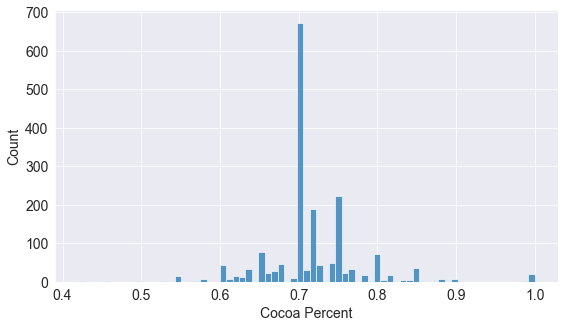

In [19]:
sns.histplot(x='Cocoa Percent', data=choc_df)

We can see that most of the chocolates reviewed have around 70% cocoa.

### Cocoa Percentage
Now let's look at the relationship between cocoa percentage and rating using a bar chart.

First, let's add a column that describes the rating according to the Flavors of Cocoa rating system

5= Elite (Transcending beyond the ordinary limits)

4= Premium (Superior flavor development, character and style)

3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)

2= Disappointing (Passable but contains at least one significant flaw)

1= Unpleasant (mostly unpalatable)

In [20]:
choc_df['Rating Description'] = 'Elite'
choc_df.loc[choc_df['Rating'] < 5, 'Rating Description'] = 'Premium'
choc_df.loc[choc_df['Rating'] < 4, 'Rating Description'] = 'Praiseworthy'
choc_df.loc[choc_df['Rating'] < 3.75, 'Rating Description'] = 'Satisfactory'
choc_df.loc[choc_df['Rating'] < 3, 'Rating Description'] = 'Disappointing'
choc_df.loc[choc_df['Rating'] < 2, 'Rating Description'] = 'Unpleasant'
choc_df

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating Description
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome,Praiseworthy
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo,Disappointing
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo,Satisfactory
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo,Satisfactory
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru,Satisfactory
...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,NaN,Peru,Praiseworthy
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo,Satisfactory
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India,Satisfactory
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,NaN,India,Satisfactory


<AxesSubplot:xlabel='Cocoa Percent', ylabel='Rating'>

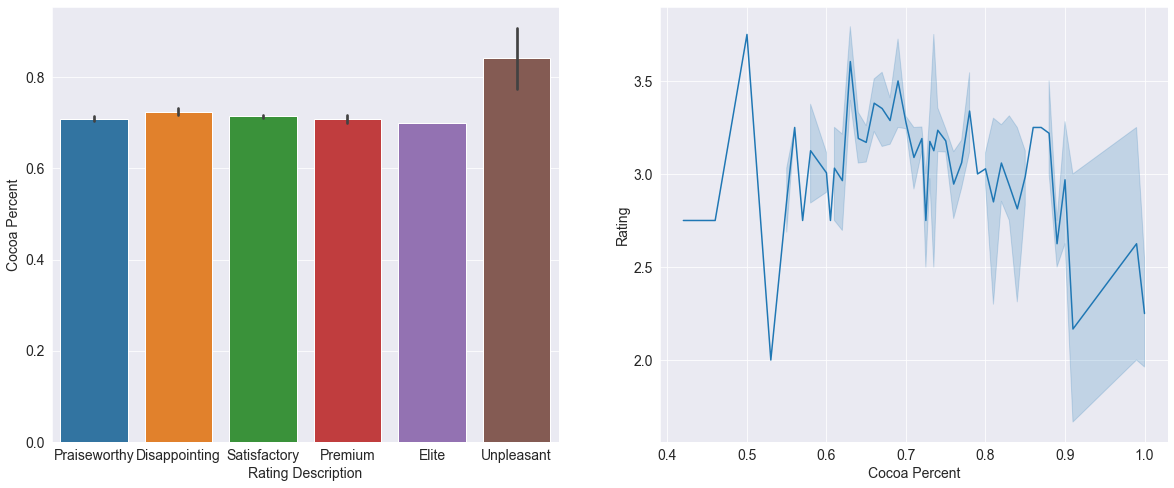

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.barplot(x='Rating Description', y='Cocoa Percent', data=choc_df)
plt.subplot(1, 2, 2)
sns.lineplot(x='Cocoa Percent', y='Rating', data=choc_df)

We can infer from these graphs that the chocolate bars containing cocoa higher than 80% mostly have an unpleasant taste. The bars with lower percent cocoa (40%-50%) are also mostly rated lower. The optimal cocoa percentage is around 70%.

### Company Locations
Now let us find out if the company location impacts the rating of the chocolate. We will only look at the locations with more than 10 ratings.

<AxesSubplot:>

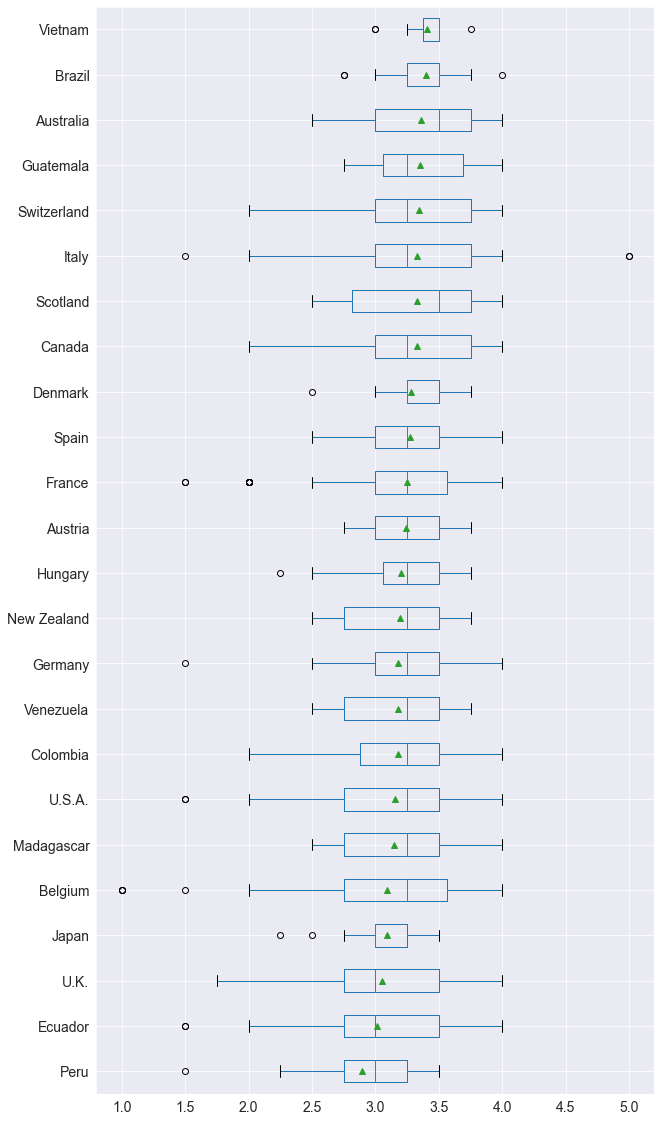

In [22]:
# sort by mean ratings of each location
grouped = choc_df.groupby(['Company Location'])
sorted_df = pd.DataFrame({col:vals['Rating'] for col,vals in grouped})
sorted_df
means = sorted_df.mean()
means.sort_values(ascending=True, inplace=True)
# drop columns with too few ratings
sorted_df = sorted_df[means.index].dropna(thresh=10, axis=1)
plt.figure(figsize=(10,20))
sorted_df.boxplot(vert=False, showmeans=True)

Vietnam has the highest average rating (around 3.75). It also doesn't have any extreme rating values. Therefore we can conclude that companies in Vietnam consistently produce good quality chocolate. 
However, there does not appear to be a strong relationship betweeen company location and ratings.

### Manufacturing Company
Now we'll do the same with the chocolate companies to see which one produces the highest rated.

<AxesSubplot:>

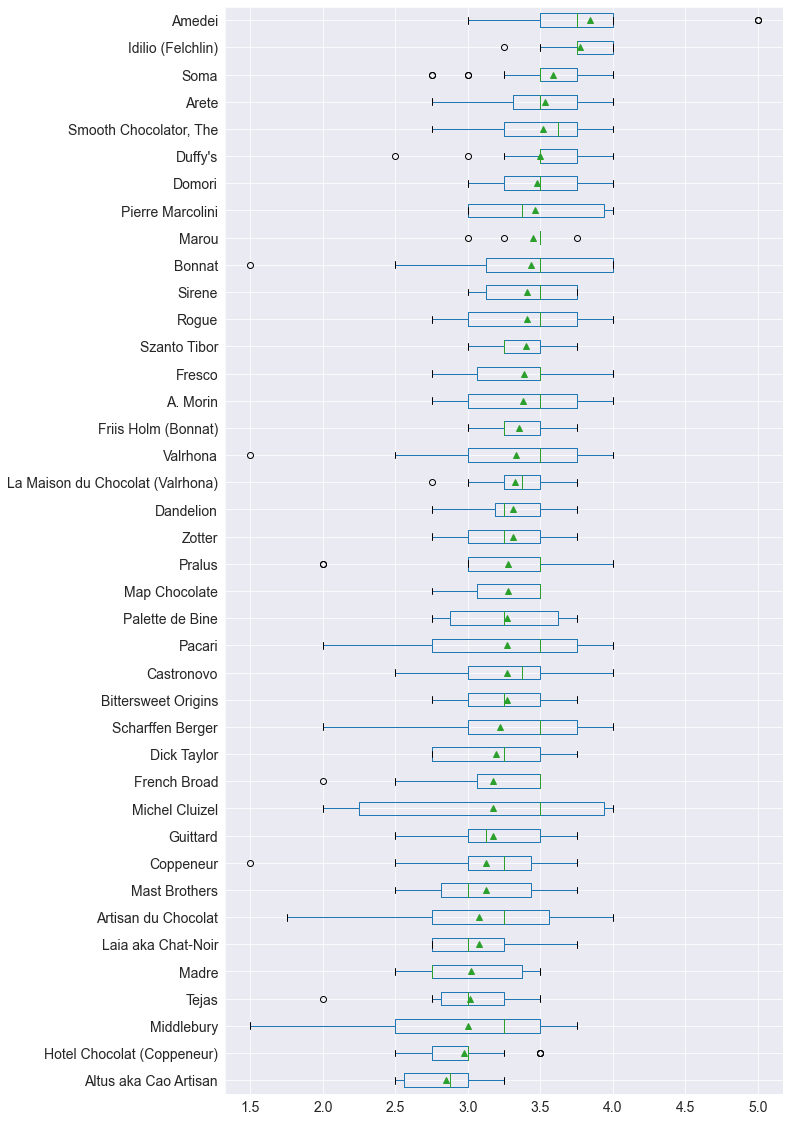

In [23]:
# sort by mean ratings of each company
grouped = choc_df.groupby(['Company'])
sorted_df = pd.DataFrame({col:vals['Rating'] for col,vals in grouped})
sorted_df
means = sorted_df.mean()
means.sort_values(ascending=True, inplace=True)
# drop columns with too few ratings
sorted_df = sorted_df[means.index].dropna(thresh=10, axis=1)
plt.figure(figsize=(10,20))
sorted_df.boxplot(vert=False, showmeans=True)

It seems Amedei makes the best chocolates! Felchlin is a close second. Domori, Marou, Sirene, Szanto Tibor & Pierre Marcolini all consistently produce good quality chocolates rated 3.0 or higher.

Now let's visualise the trend for the ratings over time for these companies.

<AxesSubplot:xlabel='Review Date', ylabel='Rating'>

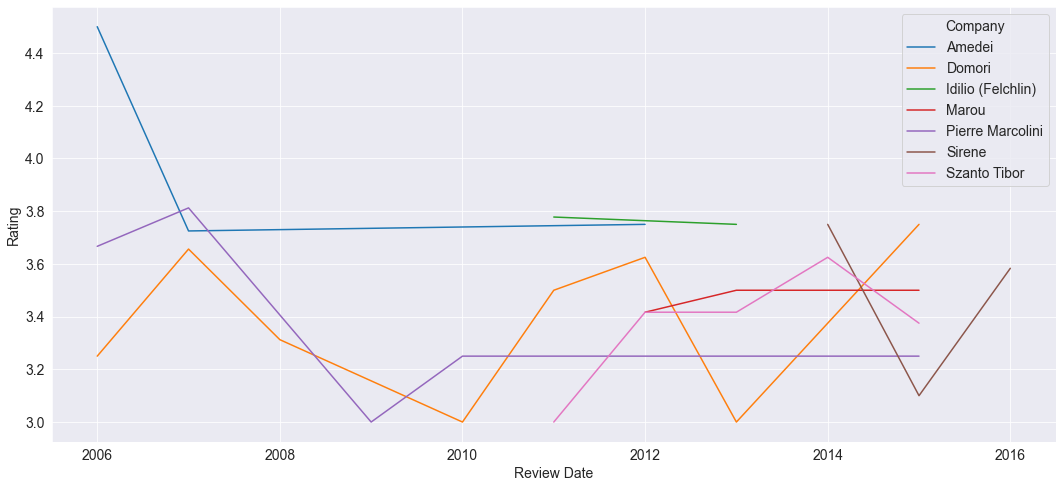

In [24]:
top_df = choc_df.loc[choc_df['Company'].isin(['Amedei', 'Idilio (Felchlin)', 'Domori','Marou', 'Sirene', 'Szanto Tibor', 'Pierre Marcolini'])]
plt.figure(figsize=(18,8))
sns.lineplot(x = "Review Date", y = "Rating", data = top_df, hue = "Company",  legend="brief", err_style = None)

There does not appear to be any significant trend in the ratings over time.

### Broad Bean Origin
What is the impact of broad bean origin on the ratings?

<AxesSubplot:>

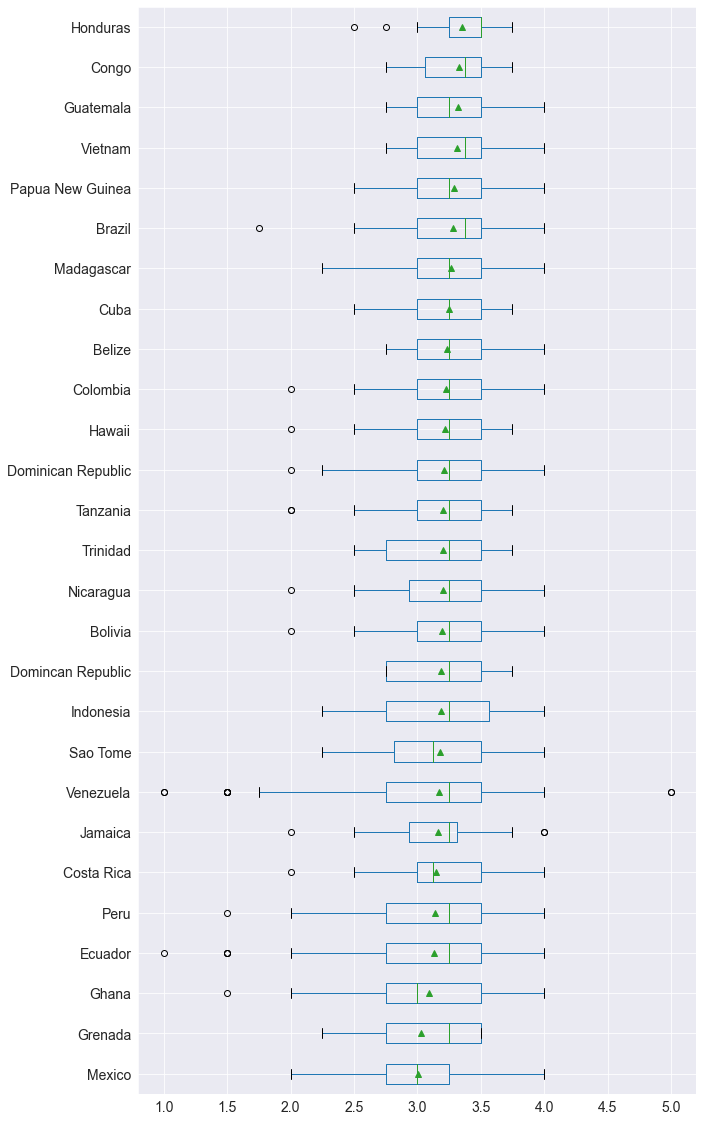

In [25]:
# sort by mean ratings of each broad bean origin
grouped = choc_df.groupby(['Broad Bean Origin'])
sorted_df = pd.DataFrame({col:vals['Rating'] for col,vals in grouped})
sorted_df
means = sorted_df.mean()
means.sort_values(ascending=True, inplace=True)
# drop columns with too few ratings
sorted_df = sorted_df[means.index].dropna(thresh=10, axis=1)
plt.figure(figsize=(10,20))
sorted_df.boxplot(vert=False, showmeans=True)

The broad bean origin doesn't seem to have a significant effect on the ratings.

Let's look at the relationship between specific bean origin / bar name and broad bean origin using a heatmap.

<AxesSubplot:xlabel='Broad Bean Origin', ylabel='Company'>

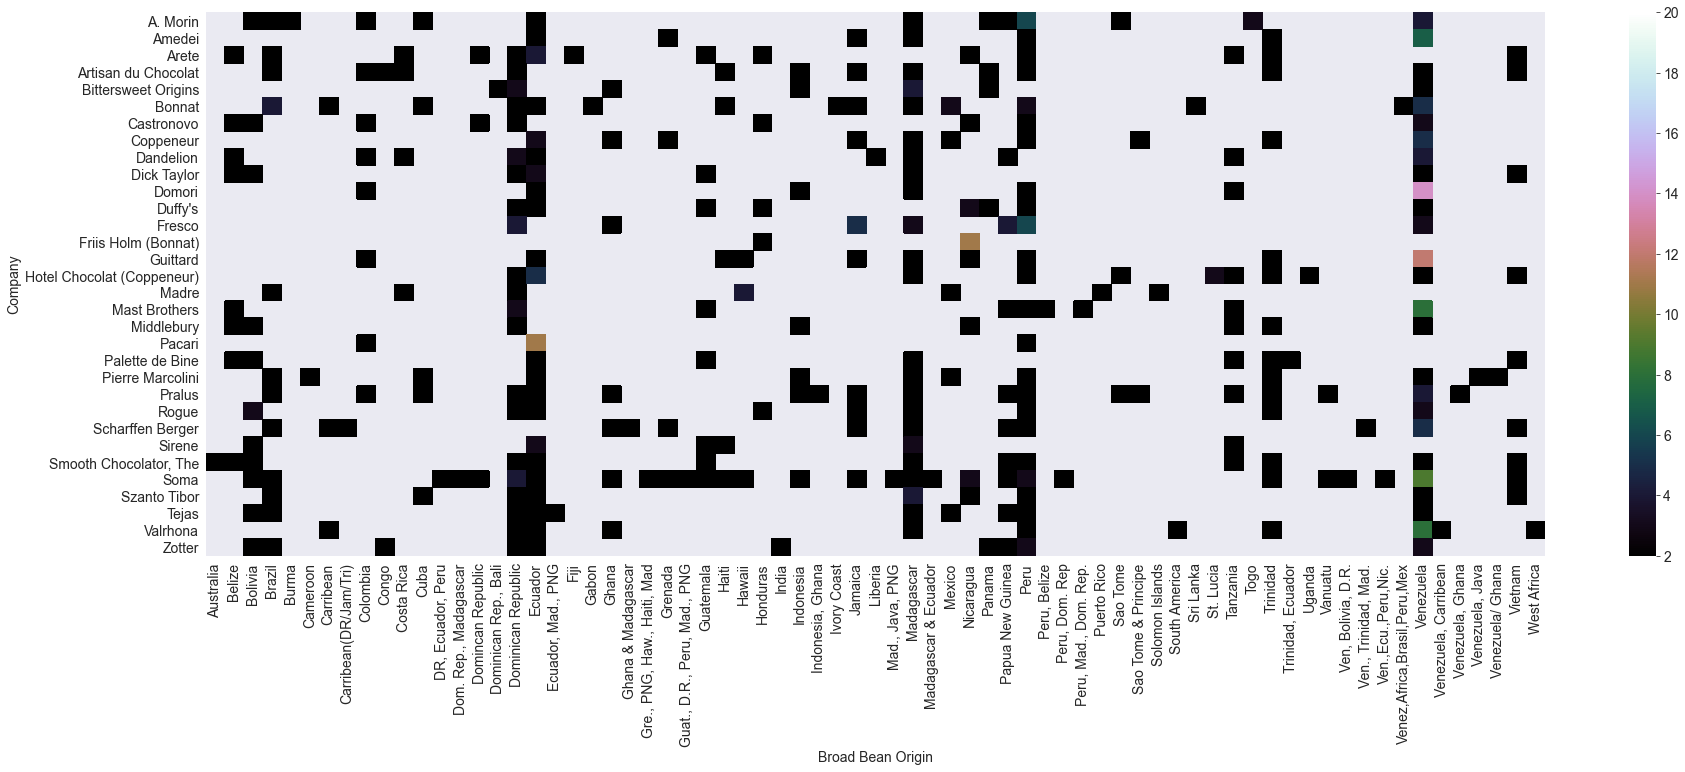

In [26]:
#Choose companies with more than 10 observations

top_df = choc_df.loc[choc_df['Company'].map(choc_df['Company'].value_counts()) > 10]

top_df=pd.DataFrame(top_df.groupby(['Company', 'Broad Bean Origin'])['Rating'].count()).reset_index().pivot('Company', 'Broad Bean Origin','Rating')
plt.figure(figsize=(30,10))
sns.heatmap(data=top_df,cmap="cubehelix",vmin=2, vmax=20)

We can see that Dominican Republic, Ecuador, Peru, Madagascar and Venezuela are the most popular for their beans.

#### Which is the highest rated chocolate?

In [48]:
best = choc_df.loc[choc_df['Rating'] == 5]
print('The best chocolate bars are: ')
for idx,row in best.iterrows():
    print(row['Company']+ " " + row['Specific Bean Origin or Bar Name'] + ', Bean Type: ' + row['Bean Type'])

The best chocolate bars are: 
Amedei Chuao, Bean Type: Trinitario
Amedei Toscano Black, Bean Type: Blend


#### How have the ratings changed over time?

<AxesSubplot:xlabel='Review Date', ylabel='Rating'>

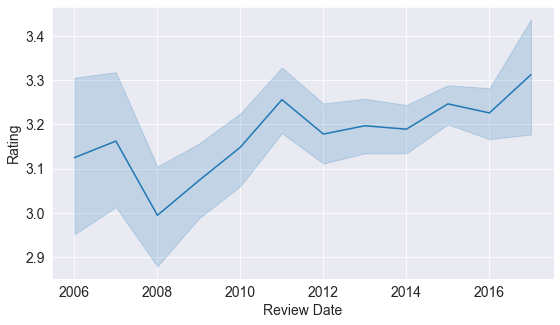

In [38]:
sns.lineplot(x = "Review Date", y = "Rating", data = choc_df)

The chocolate quality seems to be improving with time. Let us look at the standard deviation of ratings each year.

<AxesSubplot:xlabel='Review Date', ylabel='Rating'>

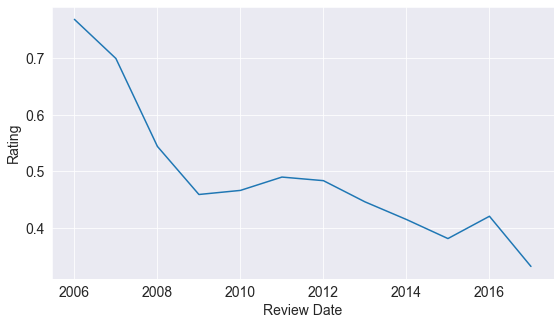

In [46]:
ratings_std = choc_df.groupby('Review Date')['Rating'].std().reset_index()
sns.lineplot(x = "Review Date", y = "Rating", data = ratings_std)

Extreme ratings are becoming a lot fewer over time.

## Inferences and Conclusion

* The best quality chocolates have around 70% cocoa. Above 90% cocoa, the chocolate quality rapidly declines.
* Company location does not have a significant impact on chocolate ratings.Vietnam, Brazil & Australia are the company locations with highest average rating.
* Amedei makes the best chocolates. It is the only company in this dataset to have chocolate bars rated 5.0.
* The most popular broad bean origins are Dominican Republic, Ecuador, Peru, Madagascar and Venezuela. The broad bean origin does not have a significant impact on the ratings.
* The average ratings have increased over the years. The spread of ratings has decreased significantly over time due to less extreme ratings being given.